In [1]:
from matplotlib import pyplot as plt
from IPython import display
import numpy as np
import random
from matplotlib import colors
import copy
import time
import scipy.optimize

%matplotlib inline

In [2]:
# assumes periodic BCs
def metropolis_potts(init, q, boltz):
    """Returns a grid evolved one step in the q-state Potts model using the Metropolis algorithm"""
    
    grid = copy.copy(init)
    
    X = np.shape(grid)[1]
    Y = np.shape(grid)[0]
    
    # randomly choose new state
    new_state = random.randint(1,q)
    
    # select random spin from the input spin grid
    x = random.choice(range(X))
    y = random.choice(range(Y))
    
    # checking the energy cost
    energy_i = potts_energy_spin(grid, [y,x])
    energy_f = potts_energy_spin(grid, [y,x], new_state)
    
    d_energy = int(energy_f - energy_i)
    
    # applying the metropolis algorithm
    if d_energy <= 0:
        grid[y,x] = new_state
        
    elif random.uniform(0,1) < boltz[str(d_energy)]:
        grid[y,x] = new_state
        
    else:
        d_energy = 0
        

    return [grid, d_energy]

In [3]:
# assumes periodic boundary condition
def heatbath_potts(init, q, boltz):
    """Returns a grid evolved one step in the q-state Potts model using the heat-bath algorithm"""
    
    grid = copy.copy(init)
    
    X = np.shape(grid)[1]
    Y = np.shape(grid)[0]
    
    # select random spin from the input spin grid
    x = random.choice(range(X))
    y = random.choice(range(Y))
    
    
    # compute the relevant energies for the heat-bath algorithm (only nearest neighbor interactions)
    # we only want to compute the energies that are non-zero
    check = []
    check.append(grid[(y+1) % Y, x])
    check.append(grid[(y-1) % Y, x])
    check.append(grid[y % Y, (x+1) % X])
    check.append(grid[y % Y, (x-1) % X])
    check = list(set(check))
    
    
    
    # initialize the probabilities to 1 because the zero energies have boltzmann factor equal to 1
    probs = np.ones(q)
    
    # replace the appropriate elements with the boltzman factors; note that order in probs is important!
    for c in check:
        e = potts_energy_spin(grid, [y,x], c)
        probs[c-1] = boltz[str(e)]
        
    probs = np.array(probs)/np.sum(probs)   
    
    new_state = np.random.choice(range(1, q+1), p = probs)
    
    grid[y,x] = new_state
    
    return grid

    

In [6]:
def potts_energy_spin(init, spin, q = None):
    """Compute the energy of a spin on a Potts lattice"""
    
    grid = copy.copy(init)
    
    X = np.shape(grid)[1]
    Y = np.shape(grid)[0]
    
    x = spin[1]
    y = spin[0]
    
    # allows you to change the value of the spin in question
    if q is not None:
        grid[y,x] = q
    
    energy = 0
    
    if grid[y, (x + 1) % X] == grid[y,x]:
        energy += -1

    if grid[y, (x - 1) % X] == grid[y,x]:
        energy += -1

    if grid[(y + 1) % Y, x] == grid[y,x]:
        energy += -1

    if grid[(y - 1) % Y, x] == grid[y,x]:
        energy += -1
    
    return energy
    
    
    

In [7]:
def potts_energy(init):
    """Computes the energy of a Potts grid"""
    
    grid = copy.copy(init)
    
    X = np.shape(grid)[1]
    Y = np.shape(grid)[0]
    
    energy = 0
    
    for i in range(Y):
        for j in range(X):
            spin_energy = potts_energy_spin(init, [i,j])
            energy += spin_energy
            
    return energy/2
    
    

In [8]:
def plot_potts(grid, title = '', cmap = plt.cm.coolwarm):
    """Plot a Potts grid using a color map"""
    
    fig, ax = plt.subplots(figsize=(8,8))
    plt.imshow(grid, cmap=cmap)
    plt.colorbar()
    
    plt.title(title, fontsize=20)
    ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

In [54]:
random.seed(2)
init = np.random.randint(1, 11, (20, 20))
test = copy.copy(init)

T = 0.5
boltz = {'-1' : np.exp(1/T), '-2' : np.exp(2/T), '-3' : np.exp(3/T), '-4' : np.exp(4/T)}

In [34]:
energy_list = []

start = time.time()
for i in range(400*1000):
    output = heatbath_potts(test, 10, boltz)
    energy_list.append(potts_energy(output))
    test = output
    if ((i+1) % 20000) == 0: 
        tick = time.time()
        print(f'Sweep {(i+1)/400}; {tick-start} seconds')
    
energy_list = np.array(energy_list)/400

#np.save('potts20_heatbath1000.npy', energy_list)

Sweep 50.0; 21.649895668029785 seconds
Sweep 100.0; 48.16802978515625 seconds
Sweep 150.0; 76.37305998802185 seconds
Sweep 200.0; 104.564697265625 seconds
Sweep 250.0; 132.81783866882324 seconds
Sweep 300.0; 163.28115582466125 seconds
Sweep 350.0; 193.4354648590088 seconds
Sweep 400.0; 224.01930975914001 seconds
Sweep 450.0; 254.2023868560791 seconds
Sweep 500.0; 285.28619956970215 seconds
Sweep 550.0; 316.0580279827118 seconds
Sweep 600.0; 347.2464964389801 seconds
Sweep 650.0; 378.4478614330292 seconds
Sweep 700.0; 408.7990822792053 seconds
Sweep 750.0; 438.9583513736725 seconds
Sweep 800.0; 469.66272377967834 seconds
Sweep 850.0; 500.3239459991455 seconds
Sweep 900.0; 531.1825737953186 seconds
Sweep 950.0; 562.7519698143005 seconds
Sweep 1000.0; 593.5327272415161 seconds


In [55]:
met_boltz = {'1' : np.exp(-1/T), '2' : np.exp(-2/T), '3' : np.exp(-3/T), '4' : np.exp(-4/T)}

In [56]:
energy_list_met = []

start = time.time()
for i in range(400*1000):
    output = metropolis_potts(test, 10, met_boltz)[0]
    energy_list_met.append(potts_energy(output))
    test = output
    if ((i+1) % 20000) == 0: 
        tick = time.time()
        print(f'Sweep {(i+1)/400}; {tick-start} seconds')
        
energy_list_met = np.array(energy_list_met)/400

#np.save('potts20_met1000.npy', energy_list_met)

Sweep 50.0; 28.977301120758057 seconds
Sweep 100.0; 57.517130851745605 seconds
Sweep 150.0; 85.46622490882874 seconds
Sweep 200.0; 113.76301431655884 seconds
Sweep 250.0; 142.3137559890747 seconds
Sweep 300.0; 170.98105716705322 seconds
Sweep 350.0; 199.14095091819763 seconds
Sweep 400.0; 227.5706684589386 seconds
Sweep 450.0; 256.0445303916931 seconds
Sweep 500.0; 284.6949677467346 seconds
Sweep 550.0; 313.0641734600067 seconds
Sweep 600.0; 341.5965631008148 seconds
Sweep 650.0; 369.9920566082001 seconds
Sweep 700.0; 398.62513422966003 seconds
Sweep 750.0; 427.54341173171997 seconds
Sweep 800.0; 455.74199318885803 seconds
Sweep 850.0; 484.11566281318665 seconds
Sweep 900.0; 512.5295088291168 seconds
Sweep 950.0; 540.9116101264954 seconds
Sweep 1000.0; 569.8750236034393 seconds


In [19]:
x_values = np.array([i for i in range(1,400*1000+1)])/400

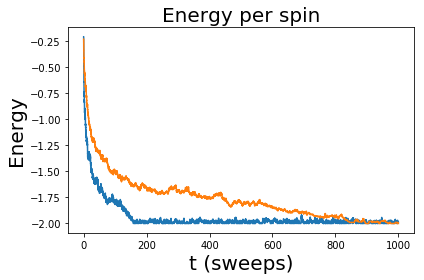

In [57]:
plt.plot(x_values, energy_list)
plt.plot(x_values,energy_list_met)
plt.title('Energy per spin', fontsize = 20)
plt.xlabel("t (sweeps)", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.tight_layout()

In [339]:
random.seed(1)
init3 = np.random.randint(1, 4, (20, 20))
test3 = copy.copy(init3)

T = 0.5
boltz = {'-1' : np.exp(1/T), '-2' : np.exp(2/T), '-3' : np.exp(3/T), '-4' : np.exp(4/T)}

In [335]:
energy_list_q3 = []

start = time.time()
for i in range(400*700):
    output3 = heatbath_potts(test3, 3, boltz)
    energy_list_q3.append(potts_energy(output3))
    test3 = output3
    if ((i+1) % 20000) == 0: 
        tick = time.time()
        print(f'Sweep {(i+1)/400}; {tick-start} seconds')
    
energy_list_q3 = np.array(energy_list_q3)/400

# np.save('potts20_heatbath_q3.npy', energy_list_q3)

Sweep 50.0; 21.67469596862793 seconds
Sweep 100.0; 42.98979139328003 seconds
Sweep 150.0; 64.0340723991394 seconds
Sweep 200.0; 85.33528017997742 seconds
Sweep 250.0; 106.42420077323914 seconds
Sweep 300.0; 127.53544092178345 seconds
Sweep 350.0; 148.63775300979614 seconds
Sweep 400.0; 169.72816133499146 seconds
Sweep 450.0; 191.00754570960999 seconds
Sweep 500.0; 214.37508940696716 seconds
Sweep 550.0; 238.94245600700378 seconds
Sweep 600.0; 260.24366426467896 seconds
Sweep 650.0; 281.44716024398804 seconds
Sweep 700.0; 302.8059046268463 seconds


In [340]:
energy_list_metq3 = []

start = time.time()
for i in range(400*700):
    output3 = metropolis_potts(test3, 3, met_boltz)[0]
    energy_list_metq3.append(potts_energy(output3))
    test3 = output3
    if ((i+1) % 20000) == 0: 
        tick = time.time()
        print(f'Sweep {(i+1)/400}; {tick-start} seconds')
        
energy_list_metq3 = np.array(energy_list_metq3)/400

# np.save('potts20_met_q3.npy', energy_list_metq3)

Sweep 50.0; 19.850408792495728 seconds
Sweep 100.0; 39.7290894985199 seconds
Sweep 150.0; 59.59090614318848 seconds
Sweep 200.0; 79.5876350402832 seconds
Sweep 250.0; 99.84228348731995 seconds
Sweep 300.0; 122.00801920890808 seconds
Sweep 350.0; 142.90945172309875 seconds
Sweep 400.0; 163.29603624343872 seconds
Sweep 450.0; 184.0690050125122 seconds
Sweep 500.0; 204.2209813594818 seconds
Sweep 550.0; 224.29161405563354 seconds
Sweep 600.0; 244.63008666038513 seconds
Sweep 650.0; 265.48737502098083 seconds
Sweep 700.0; 286.0921995639801 seconds


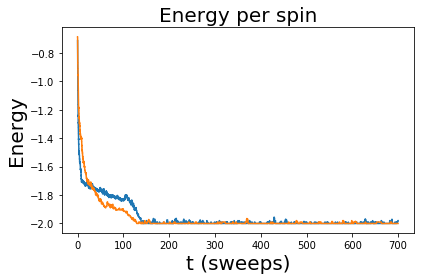

In [341]:
plt.plot(x_values, energy_list_q3)
plt.plot(x_values, energy_list_metq3)
plt.title('Energy per spin', fontsize = 20)
plt.xlabel("t (sweeps)", fontsize=20)
plt.ylabel("Energy", fontsize=20)
plt.tight_layout()

In [249]:
temps = [i for i in np.arange(0.6, 1.4, 0.01)]
init20 = np.random.randint(1, 4, (20, 20))

In [250]:
n_eq = 400
n = 400
n1 = 1/(n * 20**2)
n2 = 1/(n**2 * 20**2)

eneps_list20 = np.zeros(len(temps))
spec_heat20 = np.zeros(len(temps))

In [251]:
start = time.time()

for i in range(len(temps)):
    grid = copy.copy(init20)
    T = temps[i]
    met_boltz = {'1' : np.exp(-1/T), '2' : np.exp(-2/T), '3' : np.exp(-3/T), '4' : np.exp(-4/T)}
    
    for j in range(n_eq*400):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
    
    # initialize the totals that will be used to compute averages
    e_total = 0
    e2_total = 0
    
    # measurements to average
    for k in range(1, n*400+1):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
        
        if (k % 400) == 0:
            energy = potts_energy(grid)

            e_total += energy
            e2_total += energy*energy
        
    tick = time.time()
    print(f'T = {T}; {tick - start} seconds')
            
    
    # compute averages
    eneps_list20[i] = n1*e_total
    spec_heat20[i] = (n1*e2_total - n2*e_total*e_total)/(T*T)
 

T = 0.6; 3.662959098815918 seconds
T = 0.61; 7.393373727798462 seconds
T = 0.62; 11.029052495956421 seconds
T = 0.63; 14.62108325958252 seconds
T = 0.64; 18.236425638198853 seconds
T = 0.65; 21.790760278701782 seconds
T = 0.66; 26.330646514892578 seconds
T = 0.67; 29.97922134399414 seconds
T = 0.68; 33.6912841796875 seconds
T = 0.6900000000000001; 37.26297926902771 seconds
T = 0.7000000000000001; 40.82227349281311 seconds
T = 0.7100000000000001; 44.38702416419983 seconds
T = 0.7200000000000001; 48.1551353931427 seconds
T = 0.7300000000000001; 51.91034936904907 seconds
T = 0.7400000000000001; 55.672508001327515 seconds
T = 0.7500000000000001; 59.4693865776062 seconds
T = 0.7600000000000001; 63.0758011341095 seconds
T = 0.7700000000000001; 66.59343218803406 seconds
T = 0.7800000000000001; 70.49347925186157 seconds
T = 0.7900000000000001; 74.82901310920715 seconds
T = 0.8000000000000002; 79.92838716506958 seconds
T = 0.8100000000000002; 84.85515356063843 seconds
T = 0.8200000000000002; 90

Text(0,0.5,'Specific Heat per spin')

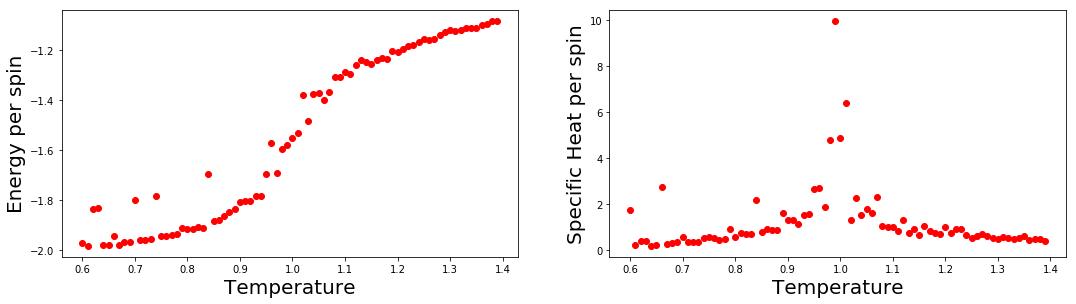

In [253]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list20, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Energy per spin", fontsize=20)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat20, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [270]:
temps = [i for i in np.arange(0.6, 1.4, 0.01)]
init25 = np.random.randint(1, 4, (25, 25))

In [271]:
n_eq = 500
n = 500
n1 = 1/(n * 25**2)
n2 = 1/(n**2 * 25**2)

eneps_list25 = np.zeros(len(temps))
spec_heat25 = np.zeros(len(temps))

In [272]:
start = time.time()

for i in range(len(temps)):
    grid = copy.copy(init25)
    T = temps[i]
    met_boltz = {'1' : np.exp(-1/T), '2' : np.exp(-2/T), '3' : np.exp(-3/T), '4' : np.exp(-4/T)}
    
    for j in range(n_eq*625):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
    
    # initialize the totals that will be used to compute averages
    e_total = 0
    e2_total = 0
    
    # measurements to average
    for k in range(1, n*625+1):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
        
        if (k % 625) == 0:
            energy = potts_energy(grid)

            e_total += energy
            e2_total += energy*energy
    
    
    if (T  == 0.6) or (T == 0.9) or (T == 1.2) or (T == 1.4):
        tick = time.time()
        print(f'T = {T}; {tick - start} seconds')
            
    
    # compute averages
    eneps_list25[i] = n1*e_total
    spec_heat25[i] = (n1*e2_total - n2*e_total*e_total)/(T*T)
 

Text(0,0.5,'Specific Heat per spin')

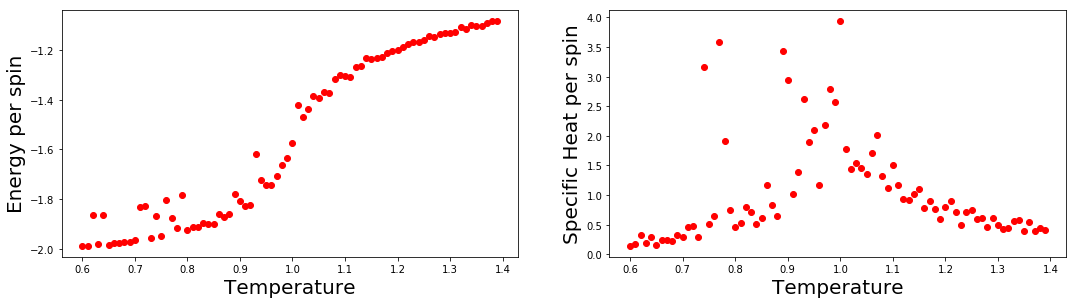

In [273]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list25, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Energy per spin", fontsize=20)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat25, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [274]:
np.save('Potts_eneps25.npy', eneps_list25)
np.save('Potts_spec_heat25.npy', spec_heat25)

In [299]:
temps = [i for i in np.arange(0.6, 1.4, 0.01)]
init15 = np.random.randint(1, 4, (15, 15))

In [300]:
n_eq = 350
n = 350
n1 = 1/(n * 15**2)
n2 = 1/(n**2 * 15**2)

eneps_list15 = np.zeros(len(temps))
spec_heat15 = np.zeros(len(temps))

In [301]:
start = time.time()

for i in range(len(temps)):
    grid = copy.copy(init15)
    T = temps[i]
    met_boltz = {'1' : np.exp(-1/T), '2' : np.exp(-2/T), '3' : np.exp(-3/T), '4' : np.exp(-4/T)}
    
    for j in range(n_eq*225):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
    
    # initialize the totals that will be used to compute averages
    e_total = 0
    e2_total = 0
    
    # measurements to average
    for k in range(1, n*225+1):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
        
        if (k % 225) == 0:
            energy = potts_energy(grid)

            e_total += energy
            e2_total += energy*energy
    
    if (T  == 0.6) or (0.895 < T < 0.905) or (1.195 < T < 1.205) or (1.395 < T < 1.405):
        tick = time.time()
        print(f'T = {T}; {tick - start} seconds')
            
    
    # compute averages
    eneps_list15[i] = n1*e_total
    spec_heat15[i] = (n1*e2_total - n2*e_total*e_total)/(T*T)
 

T = 0.6; 1.6268794536590576 seconds
T = 0.9000000000000002; 49.89857339859009 seconds
T = 1.2000000000000006; 97.84439611434937 seconds


Text(0,0.5,'Specific Heat per spin')

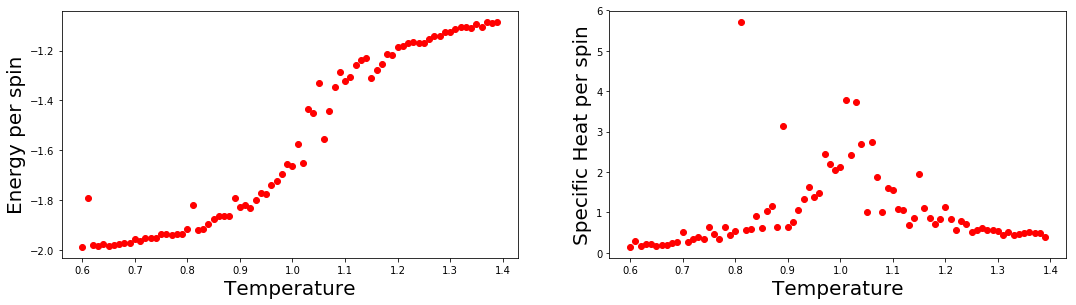

In [302]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list15, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Energy per spin", fontsize=20)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat15, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [303]:
np.save('Potts_eneps15.npy', eneps_list15)
np.save('Potts_spec_heat15.npy', spec_heat15)

In [290]:
temps = [i for i in np.arange(0.6, 1.4, 0.01)]
init10 = np.random.randint(1, 4, (10, 10))

In [291]:
n_eq = 300
n = 300
n1 = 1/(n * 10**2)
n2 = 1/(n**2 * 10**2)

eneps_list10 = np.zeros(len(temps))
spec_heat10 = np.zeros(len(temps))

In [292]:
start = time.time()

for i in range(len(temps)):
    grid = copy.copy(init10)
    T = temps[i]
    met_boltz = {'1' : np.exp(-1/T), '2' : np.exp(-2/T), '3' : np.exp(-3/T), '4' : np.exp(-4/T)}
    
    for j in range(n_eq*100):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
    
    # initialize the totals that will be used to compute averages
    e_total = 0
    e2_total = 0
    
    # measurements to average
    for k in range(1, n*100+1):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
        
        if (k % 100) == 0:
            energy = potts_energy(grid)

            e_total += energy
            e2_total += energy*energy
    
    if (T % 0.1) == 0:
        tick = time.time()
        print(f'T = {T}; {tick - start} seconds')
            
    
    # compute averages
    eneps_list10[i] = n1*e_total
    spec_heat10[i] = (n1*e2_total - n2*e_total*e_total)/(T*T)
 

Text(0,0.5,'Specific Heat per spin')

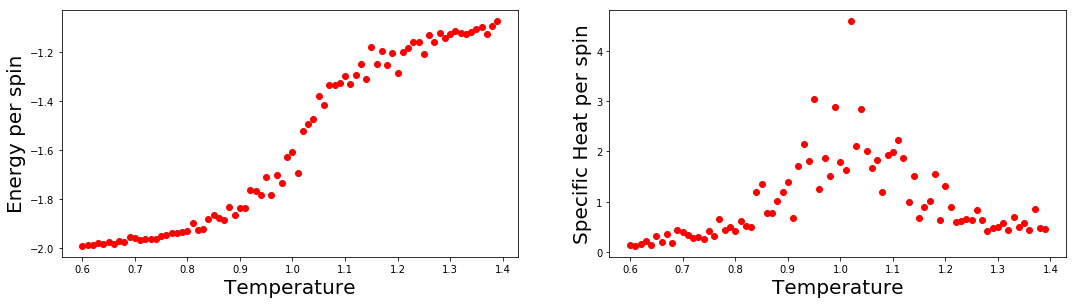

In [293]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list10, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Energy per spin", fontsize=20)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat10, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [298]:
np.save('Potts_eneps10.npy', eneps_list10)
np.save('Potts_spec_heat10.npy', spec_heat10)

In [313]:
temps = [i for i in np.arange(0.6, 1.4, 0.01)]
init8 = np.random.randint(1, 4, (8, 8))

In [314]:
n_eq = 300
n = 300
n1 = 1/(n * 8**2)
n2 = 1/(n**2 * 8**2)

eneps_list8 = np.zeros(len(temps))
spec_heat8 = np.zeros(len(temps))

In [315]:
start = time.time()

for i in range(len(temps)):
    grid = copy.copy(init8)
    T = temps[i]
    met_boltz = {'1' : np.exp(-1/T), '2' : np.exp(-2/T), '3' : np.exp(-3/T), '4' : np.exp(-4/T)}
    
    for j in range(n_eq*64):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
    
    # initialize the totals that will be used to compute averages
    e_total = 0
    e2_total = 0
    
    # measurements to average
    for k in range(1, n*64+1):
        grid = metropolis_potts(grid, 3, met_boltz)[0]
        
        if (k % 64) == 0:
            energy = potts_energy(grid)

            e_total += energy
            e2_total += energy*energy
    
    if (T  == 0.6) or (0.895 < T < 0.905) or (1.195 < T < 1.205) or (1.395 < T < 1.405):
        tick = time.time()
        print(f'T = {T}; {tick - start} seconds')
            
    
    # compute averages
    eneps_list8[i] = n1*e_total
    spec_heat8[i] = (n1*e2_total - n2*e_total*e_total)/(T*T)
 

T = 0.6; 0.4285440444946289 seconds
T = 0.9000000000000002; 12.387596130371094 seconds
T = 1.2000000000000006; 24.31887125968933 seconds


Text(0,0.5,'Specific Heat per spin')

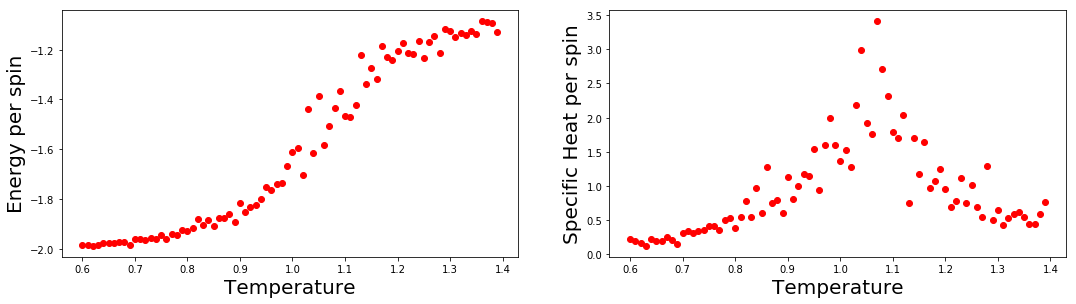

In [316]:
fig = plt.figure(figsize=(18, 10)) # plot the calculated values    

fig.add_subplot(2, 2, 1 )
plt.plot(temps, eneps_list8, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Energy per spin", fontsize=20)

fig.add_subplot(2, 2, 2 )
plt.plot(temps, spec_heat8, 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [317]:
np.save('Potts_eneps8.npy', eneps_list8)
np.save('Potts_spec_heat8.npy', spec_heat8)

Text(0,0.5,'Specific Heat per spin')

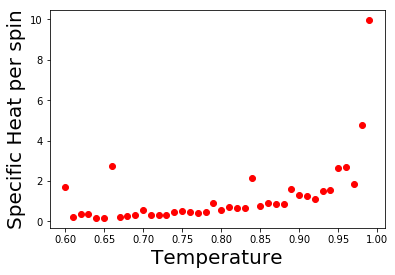

In [329]:
plt.plot(temps[:40], spec_heat20[:40], 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [340]:
def power(x, a, b, c):
    return a*((b-x)/b)**c

In [326]:
def logpower(x, a, b):
    return -a*(np.log((b-x)/b))

In [343]:
scipy.optimize.curve_fit(logpower, temps[:40], spec_heat20[:40], p0 = [0.1, 1], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(array([0.13297553, 0.99000001]), array([[1.72595435e-02, 3.85751344e-08],
        [3.85751344e-08, 1.27776036e-13]]))

In [348]:
bad_i

[14, 17, 29, 40]

In [351]:
new_spec = list(copy.copy(spec_heat25))
new_spec.pop(14)
new_spec.pop(16)
new_spec.pop(27)

3.1691445551494075

In [363]:
new_temps = list(copy.copy(temps))
new_temps.pop(14)
new_temps.pop(16)
new_temps.pop(27)

0.8900000000000002

Text(0,0.5,'Specific Heat per spin')

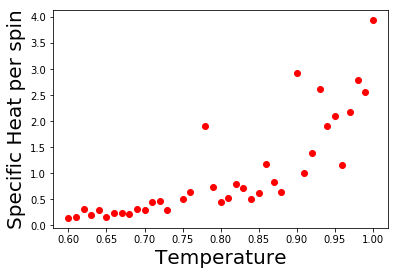

In [366]:
plt.plot(new_temps[:38], new_spec[:38], 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [373]:
scipy.optimize.curve_fit(logpower, new_temps[0:36], new_spec[0:36], p0 = [0.1, 1.1], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(array([0.48639434, 0.98283827]), array([[2.30834288e-03, 1.07841670e-04],
        [1.07841670e-04, 1.30925925e-05]]))

Text(0,0.5,'Specific Heat per spin')

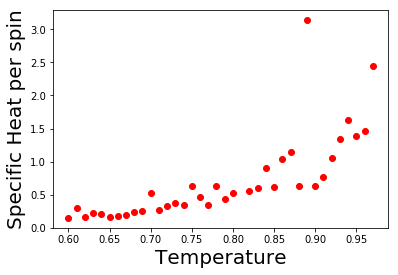

In [393]:
plt.plot(new_temp15[:37], newspec15[:37], 'ro')
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Specific Heat per spin", fontsize=20)

In [380]:
newspec15 = list(copy.copy(spec_heat15))

newspec15.pop(21)

5.714657650287646

In [381]:
new_temp15 = copy.copy(temps)
new_temp15.pop(21)

0.8100000000000002

In [398]:
scipy.optimize.curve_fit(logpower, new_temp15[0:40], newspec15[0:40], p0 = [0.1, 1.1], maxfev=10000)

C:\Users\Newton\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


(array([0.47497587, 1.00623257]), array([[2.24257529e-03, 2.42130705e-04],
        [2.42130705e-04, 5.33834048e-05]]))